# Defi-IA 2022 <a href="https://www.kaggle.com/c/defi-ia-2022/overview"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" style="max-width: 70px; display: inline" alt="Python"/></a>
-------------------------------------------------------------

**Predict the accumulated daily rainfall on ground stations**  
*Quentin Douzery, Alexia Ghozland, Dario Moed*

## <font color = 'royalblue'>1 Imports</font>

### 1.1 Packages

In [1]:
##Packages
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.preprocessing import scale , StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.models import Sequential

from tqdm import tqdm

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

### 1.2 Data

In [3]:
##Données
#coords_path = 'C:/Users/Alexia/Desktop/Other/stations_coordinates.csv' #Perso
#coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'

#xtrainS_path = 'C:/Users/Alexia/Desktop/Data/Train/X_station_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/X_station_train.csv'

#ytrain_path = 'C:/Users/Alexia/Desktop/Data/Train/Y_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/Y_train.csv'

#xtestS_path = 'C:/Users/Alexia/Desktop/Data/Test/X_station_test.csv' #Perso

#bl_obsT_path = 'C:/Users/Alexia/Desktop/Data/Test/Baselines/Baseline_observation_test.csv' #Perso

In [4]:
# ##Données
coords_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Other/stations_coordinates.csv' #Perso
# #coords_path = '/home/douzery/Bureau/Defi-IA_Data/Other/stations_coordinates.csv' #INSA

xtrainS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/X_station_train.csv' #Perso
# #xtrainS_path = '/home/douzery/Bureau/Defi-IA_Data/Train/X_station_train.csv' #INSA

ytrain_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/Y_train.csv' #Perso
# #ytrain_path = '/home/douzery/Bureau/Defi-IA_Data/Train/Y_train.csv' #INSA

xtestS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/X_station_test.csv' #Perso
# #xtestS_path = '/home/douzery/Bureau/Defi-IA_Data/Test/X_station_test.csv' #INSA

bl_obsT_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #Perso
# #bl_obsT_path = '/home/douzery/Bureau/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #INSA

## <font color = 'royalblue'>2 Récupération des données</font>

In [5]:
##X_train
xtrainS = pd.read_csv(xtrainS_path,parse_dates=['date'],infer_datetime_format=True)
xtrainS['number_sta'] = xtrainS['number_sta'].astype('category')  
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


Missing Data : 6899007 
 Shape is : (4409474, 9)


In [6]:
#Y_train
ytrain = pd.read_csv(ytrain_path, parse_dates=['date'], infer_datetime_format=True)
ytrain['number_sta'] = ytrain['number_sta'].astype('category')
display(ytrain)
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


Missing Data : 21640 
 Shape is : (183747, 4)


In [7]:
##X_test
xtestS = pd.read_csv(xtestS_path,infer_datetime_format=True)
display(xtestS)
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8
...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22


Missing Data : 3914287 
 Shape is : (2304802, 8)


In [8]:
bl_obsT = pd.read_csv(bl_obsT_path,infer_datetime_format=True)
Id_pred = bl_obsT["Id"]

## <font color = 'royalblue'>3 Pre-processing</font>

In [9]:
def Get_StationDay (id):
    return id.split('_')[0] + "_" + id.split('_')[1]

In [10]:
def Id_to_int (id):
    return int(id.split('_')[0] + id.split('_')[1] + id.split('_')[2])

### 3.1 Add 'month' variable

In [11]:
xtrainS['month'] = xtrainS['date'].dt.month
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id,month
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,1
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,1
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,1
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,1
...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,12
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,12
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,12
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,12


Missing Data : 6899007 
 Shape is : (4409474, 10)


In [12]:
ytrain['month'] = ytrain['date'].dt.month
display(ytrain)
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id,month
0,2016-01-02,14066001,3.4,14066001_0,1
1,2016-01-02,14126001,0.5,14126001_0,1
2,2016-01-02,14137001,3.4,14137001_0,1
3,2016-01-02,14216001,4.0,14216001_0,1
4,2016-01-02,14296001,13.3,14296001_0,1
...,...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729,12
183743,2017-12-31,86165005,3.2,86165005_729,12
183744,2017-12-31,86272002,1.8,86272002_729,12
183745,2017-12-31,91200002,1.6,91200002_729,12


Missing Data : 21640 
 Shape is : (183747, 5)


### 3.2 Train data

In [13]:
def Preprocess_train (xtrain, ytrain):
    #Copy original df
    xtrain_p = xtrain.copy()
    ytrain_p = ytrain.copy()
    
    #Remove NaNs
    xtrain_p.dropna(inplace=True)
    ytrain_p.dropna(inplace=True)
    
    #Remove high values of 'Ground_truth'
    ytrain_p = ytrain_p.loc[ytrain_p['Ground_truth'] < 1]
    
    #Create 'StationDay' column
    xtrain_p = xtrain_p.assign(StationDay=pd.Series(np.zeros(xtrain_p.shape[0])).values)
    xtrain_p.loc[:,"StationDay"] = xtrain_p.loc[:,"Id"].apply(Get_StationDay)
    
    #Drop useless columns
    xtrain_p.drop(['number_sta', 'date', 'Id'], axis=1, inplace=True)
    ytrain_p.drop(['date', 'number_sta'], axis=1, inplace=True)
    
    #Mean on 24 hours (except 'precip')
    xtrain_p = xtrain_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
    xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month']] = xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month']].divide(24)
    
    #Remove NaNs
    xtrain_p.dropna(inplace=True)
    
    #Keep the same rows in X_train and Y_train
    xtrain_p = xtrain_p.loc[xtrain_p['StationDay'].isin(ytrain_p["Id"])]
    ytrain_p = ytrain_p.loc[ytrain_p['Id'].isin(xtrain_p["StationDay"])]
    
    #Reset index
    xtrain_p.reset_index(drop=True,inplace=True)
    ytrain_p.reset_index(drop=True,inplace=True)
    
    #Sort xtrain
    xtrain_p = xtrain_p.set_index('StationDay')
    xtrain_p = xtrain_p.reindex(index=ytrain_p['Id'])
    xtrain_p = xtrain_p.reset_index()
    
    #Drop useless variables
    #xtrain_p.drop(['Id'], axis=1, inplace=True)
    #ytrain_p.drop(['Id'], axis=1, inplace=True)
    
    return xtrain_p, ytrain_p

In [14]:
xtrainS_aux, ytrain_aux = Preprocess_train(xtrainS, ytrain)

### 3.3 Test data

In [15]:
def Preprocess_test (xtest, bl_obsT):
    #Copy original df
    xtest_p = xtest.copy()
    
    #Create 'IntId' column
    xtest_p = xtest_p.assign(IntId=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"IntId"] = xtest_p.loc[:,"Id"].apply(Id_to_int)
    
    #Sort xtest on 'IntId' values
    xtest_p = xtest_p.sort_values('IntId', ignore_index=True)
    
    #Fill NaNs
    xtest_p = xtest_p.fillna(method="backfill")
    
    #Create 'StationDay' column
    xtest_p = xtest_p.assign(StationDay=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"StationDay"] = xtest_p.loc[:,"Id"].apply(Get_StationDay)
    
    #Drop useless variables
    xtest_p.drop(['Id', 'IntId'], axis=1, inplace=True)

    #Mean on 24 hours (except 'precip')
    xtest_p = xtest_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
    xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month']] = xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month']].divide(24)
    
    #Remove NaNs
    xtest_p.dropna(inplace=True)
    
    #Keep the same rows in xtest and ytest
    xtest_p = xtest_p.loc[xtest_p['StationDay'].isin(bl_obsT["Id"])]

    #Reset index
    xtest_p.reset_index(drop=True, inplace=True)
    
    #Sort xtest
    xtest_p = xtest_p.set_index('StationDay')
    xtest_p = xtest_p.reindex(index=bl_obsT['Id'])
    xtest_p = xtest_p.reset_index()
    
    #Drop useless variables
    xtest_p.drop(['Id'], axis=1, inplace=True)
    
    #Rearrange columns order
    xtest_p = xtest_p[['ff', 't', 'td', 'hu', 'dd', 'precip', 'month']]
    
    return xtest_p

In [16]:
xtestS_p = Preprocess_test(xtestS, bl_obsT)

## <font color = 'royalblue'>4 Exploration</font>

### 4.1 Train data

In [17]:
xtrainS_aux['month'].value_counts()

10.0    5672
7.0     5665
8.0     5510
4.0     5200
12.0    4811
3.0     4560
6.0     4500
9.0     4310
1.0     4129
5.0     4095
11.0    3976
2.0     3419
Name: month, dtype: int64

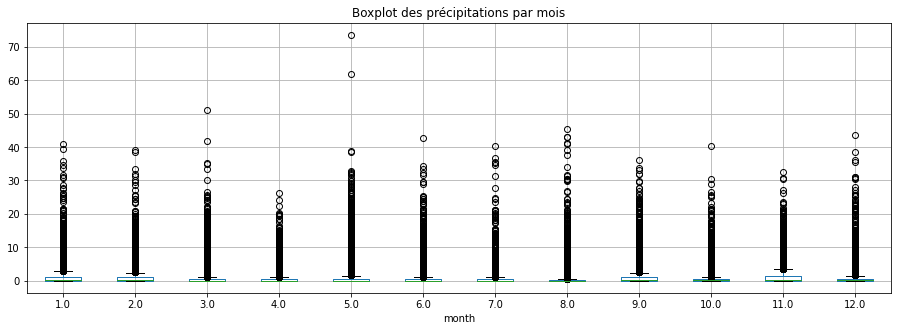

In [18]:
xtrainS_aux.boxplot(column=['precip'], by='month', figsize=(15,5))
plt.title("Boxplot des précipitations par mois")
plt.suptitle('')
plt.show()

### 4.2 Test data

In [19]:
xtestS_p['month'].value_counts()

12.0    7832
10.0    7511
11.0    7451
8.0     7377
7.0     7197
5.0     7133
3.0     7071
9.0     6978
6.0     6941
4.0     6882
1.0     6471
2.0     6296
Name: month, dtype: int64

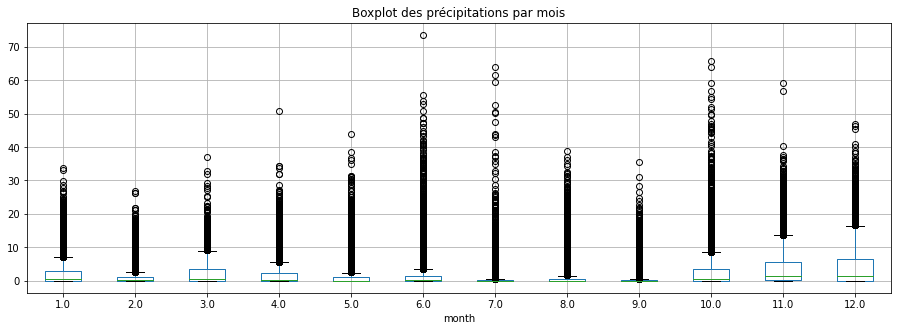

In [20]:
xtestS_p.boxplot(column=['precip'], by='month', figsize=(15,5))
plt.title("Boxplot des précipitations par mois")
plt.suptitle('')
plt.show()

1 : pareil  
2 : plus faible dans test  
3 : pareil  
4 : plus important dans test  
5 : pareil  
6 : pareil  
7 : pareil  
8 : pareil  
9 : plus faible dans test  
10 : plus important dans test  
11 : pareil  
12 : plus important dans test

**Gérer les outliers  
Utiliser la localisation pour créer des classes**

## <font color = 'royalblue'>5 Training</font>

### 5.1 Preparation

**Xtrain**

In [21]:
#dummies for 'month'
xtrainSDum = pd.get_dummies(xtrainS_aux['month'])
del xtrainSDum[1]
display(xtrainSDum)

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
55842,0,0,0,0,0,0,0,0,0,0,1
55843,0,0,0,0,0,0,0,0,0,0,1
55844,0,0,0,0,0,0,0,0,0,0,1
55845,0,0,0,0,0,0,0,0,0,0,1


In [22]:
to_drop = ['Id']

In [23]:
xtrainS_p = xtrainS_aux.drop(to_drop, axis=1)
display(xtrainS_p.head())
print('Missing Data :', xtrainS_p.isna().sum().sum(), '\n', 'Shape is :', xtrainS_p.shape)

,ff,t,td,hu,dd,precip,month
0,4.609583,279.063750,277.897083,92.375000,148.833333,0.0,1.0
1,3.670833,278.998750,278.280833,95.154167,145.083333,0.4,1.0
2,4.730833,279.165417,278.657083,96.579167,133.083333,0.8,1.0
3,4.227083,280.763750,279.713750,93.233333,128.583333,0.2,1.0
4,4.708750,281.092500,279.514167,90.258333,129.250000,0.4,1.0


Missing Data : 0 
 Shape is : (55847, 7)


**Ytrain**

In [24]:
#dummies for 'month'
ytrainDum = pd.get_dummies(ytrain_aux['month'])
del ytrainDum[1]
display(ytrainDum)

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
55842,0,0,0,0,0,0,0,0,0,0,1
55843,0,0,0,0,0,0,0,0,0,0,1
55844,0,0,0,0,0,0,0,0,0,0,1
55845,0,0,0,0,0,0,0,0,0,0,1


In [25]:
ytrain_p = ytrain_aux.drop(to_drop, axis=1)
display(ytrain_p.head())
print('Missing Data :', ytrain_p.isna().sum().sum(), '\n', 'Shape is :', ytrain_p.shape)

,Ground_truth,month
0,0.0,1
1,0.4,1
2,0.8,1
3,0.8,1
4,0.6,1


Missing Data : 0 
 Shape is : (55847, 2)


**Xtest** 

In [26]:
#dummies for 'month'
xtestSDum = pd.get_dummies(xtestS_p['month'])
del xtestSDum[1]
display(xtestSDum)

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
85135,0,0,0,0,0,0,0,0,0,0,1
85136,0,0,0,0,0,0,0,0,0,0,1
85137,0,0,0,0,0,0,0,0,0,0,1
85138,0,0,0,0,0,0,0,0,0,0,1


In [27]:
display(xtestS_p.head())
print('Missing Data :', xtestS_p.isna().sum().sum(), '\n', 'Shape is :', xtestS_p.shape)

,ff,t,td,hu,dd,precip,month
0,5.237917,282.099583,279.107917,81.720833,224.625000,1.4,1.0
1,4.103333,280.895833,279.718750,92.291667,163.166667,1.0,1.0
2,5.547083,281.167917,278.469583,83.266667,218.458333,0.4,1.0
3,2.667083,280.804583,278.105417,83.345833,207.375000,0.8,1.0
4,3.254167,279.570417,272.062500,63.250000,191.250000,3.6,1.0


Missing Data : 0 
 Shape is : (85140, 7)


### 5.2 Metrics

In [28]:
def MAPE(ypred, ytrue):
    aux = abs((ytrue-ypred)/ytrue)
    return 100*aux.mean(axis=0)

### 5.3 Normalization

In [29]:
def normalization(x_train, x_test):
    #Calcul de la moyenne et de la variance de l'échantillon train
    mean = x_train.mean()
    std  = x_train.std()
    
    #Normalisation
    x_train = (x_train - mean) / std
    x_test  = (x_test  - mean) / std

    #Mise en forme
    #x_train = np.array(x_train)
    #x_test = np.array(x_test)
    return x_train, x_test

In [30]:
xtrainS_p_N, xtestS_p_N = normalization(xtrainS_p, xtestS_p)

**Xtrain**

In [31]:
#concatenation after normalization : dummies (month) + original df
xtrainS_p_N = xtrainS_p_N.drop(['month'], axis=1)
xtrainS_p_N = pd.concat([xtrainS_p_N, xtrainSDum],axis=1)
display(xtrainS_p_N)

,ff,t,td,hu,dd,precip,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0.778049,-1.015184,-0.670801,1.204121,-0.430306,-0.369103,0,0,0,0,0,0,0,0,0,0,0
1,0.241706,-1.026013,-0.597751,1.476175,-0.477707,-0.244259,0,0,0,0,0,0,0,0,0,0,0
2,0.847324,-0.998246,-0.526128,1.615669,-0.629393,-0.119415,0,0,0,0,0,0,0,0,0,0,0
3,0.559513,-0.731954,-0.324982,1.288144,-0.686276,-0.306681,0,0,0,0,0,0,0,0,0,0,0
4,0.834707,-0.677182,-0.362974,0.996920,-0.677849,-0.244259,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55842,2.464686,0.075737,0.480239,0.955317,1.038626,2.127776,0,0,0,0,0,0,0,0,0,0,1
55843,2.543244,0.096632,0.444784,0.773404,0.636763,1.659611,0,0,0,0,0,0,0,0,0,0,1
55844,1.153228,0.070739,0.443119,0.853348,0.649930,1.378712,0,0,0,0,0,0,0,0,0,0,1
55845,3.523802,-0.061296,0.386407,1.131927,0.741047,-0.369103,0,0,0,0,0,0,0,0,0,0,1


**Xtest**

In [32]:
#concatenation after normalization : dummies (month) + original df  
xtestS_p_N = xtestS_p_N.drop(['month'], axis=1)
xtestS_p_N = pd.concat([xtestS_p_N, xtestSDum],axis=1)
display(xtestS_p_N)

,ff,t,td,hu,dd,precip,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,1.137040,-0.509396,-0.440308,0.161182,0.527739,0.067851,0,0,0,0,0,0,0,0,0,0,0
1,0.488810,-0.709948,-0.324030,1.195964,-0.249125,-0.056993,0,0,0,0,0,0,0,0,0,0,0
2,1.313678,-0.664617,-0.561821,0.312504,0.449789,-0.244259,0,0,0,0,0,0,0,0,0,0,0
3,-0.331774,-0.725151,-0.631143,0.320254,0.309690,-0.119415,0,0,0,0,0,0,0,0,0,0,0
4,0.003649,-0.930770,-1.781470,-1.646934,0.105862,0.754493,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85135,-0.958102,-1.865082,-1.488237,1.707033,-1.110259,-0.306681,0,0,0,0,0,0,0,0,0,0,1
85136,-1.003129,-1.682787,-1.378304,1.412138,-1.251035,-0.306681,0,0,0,0,0,0,0,0,0,0,1
85137,-1.111411,-1.700767,-0.044598,1.472504,-0.334448,-0.306681,0,0,0,0,0,0,0,0,0,0,1
85138,-1.679654,-2.004267,-1.806772,1.189438,-1.496321,-0.306681,0,0,0,0,0,0,0,0,0,0,1


**Ytrain**

In [33]:
#concatenation after normalization : dummies (month) + original df  
ytrain_p = ytrain_p.drop(['month'], axis=1)
ytrain_p = pd.concat([ytrain_p, ytrainDum],axis=1)
display(ytrain_p)

,Ground_truth,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0.4,0,0,0,0,0,0,0,0,0,0,0
2,0.8,0,0,0,0,0,0,0,0,0,0,0
3,0.8,0,0,0,0,0,0,0,0,0,0,0
4,0.6,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55842,0.6,0,0,0,0,0,0,0,0,0,0,1
55843,0.8,0,0,0,0,0,0,0,0,0,0,1
55844,0.4,0,0,0,0,0,0,0,0,0,0,1
55845,0.0,0,0,0,0,0,0,0,0,0,0,1


### 5.4 Build model

In [34]:
def get_model(shape, n_layers, n_neurons): 
    #shape : nb de variables explicatives 
    #n_layers : nb de couches
    #n_neurons : neurons/couche
   
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape))
    
    for i in range(n_layers): 
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
   
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'adam', 
                  loss      = 'mae')
                  #metrics   = ["mean_squared_error"])
    return model

In [35]:
#Paramètres du réseau
nb_variables = np.shape(xtrainS_p_N)[1]
n_layers = 20
n_neurons = 32

#Build the network
NN = get_model(nb_variables, n_layers, n_neurons)

#Print the network
NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1

### 5.5 Train model

Epoch 1/10
559/559 [==============================] - 3s 3ms/step - loss: 0.0889
Epoch 2/10
559/559 [==============================] - 1s 3ms/step - loss: 0.0884
Epoch 3/10
559/559 [==============================] - 1s 2ms/step - loss: 0.0886
Epoch 4/10
559/559 [==============================] - 1s 3ms/step - loss: 0.0885
Epoch 5/10
559/559 [==============================] - 2s 3ms/step - loss: 0.0884
Epoch 6/10
559/559 [==============================] - 1s 3ms/step - loss: 0.0884
Epoch 7/10
559/559 [==============================] - 2s 3ms/step - loss: 0.0883
Epoch 8/10
559/559 [==============================] - 1s 3ms/step - loss: 0.0886
Epoch 9/10
559/559 [==============================] - 1s 3ms/step - loss: 0.0885
Epoch 10/10
559/559 [==============================] - 2s 3ms/step - loss: 0.0884


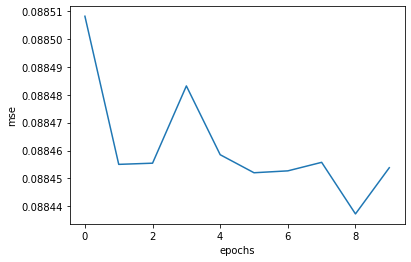

In [36]:
#Paramètres d'apprentissage
batch_size = 100
epochs = 10

#Entraînement
history = NN.fit(xtrainS_p_N, ytrain_p, batch_size, epochs, verbose=1)

#Affichage de l'évolution de la MSE
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mse")
plt.show()

## <font color = 'royalblue'>6 Validation</font>

### 6.1 Sampling

In [37]:
def Create_samples (xtrain, ytrain, seuil):
    ##Copy original df
    xtrain_c = xtrain.copy()
    ytrain_c = ytrain.copy()
    
    ##Split between low and high precipitations
    #xtrain_lp = xtrain_c.loc[xtrain_c['precip'] <= seuil]
    #xtrain_hp = xtrain_c.drop(xtrain_lp.index)
    
    ytrain_lp = ytrain_c.loc[ytrain_c['Ground_truth'] <= seuil]
    ytrain_hp = ytrain_c.drop(ytrain_lp.index)
    
    ##Split X validation/train
    #lp_v = xtrain_lp.sample(frac=0.20, axis=0) #20% sample of days with low precip
    #hp_v = xtrain_hp.sample(frac=0.20, axis=0) #20% sample of days with high precip
    #xtrain_v = pd.concat([lp_v, hp_v]) #Concat both low and high precip samples (validation one)
    #xtrain_t = xtrain_c.drop(xtrain_v.index) #Create train sample (80% data)
    
    lp_v = ytrain_lp.sample(frac=0.20, axis=0) #20% sample of days with low precip
    hp_v = ytrain_hp.sample(frac=0.20, axis=0) #20% sample of days with high precip
    ytrain_v = pd.concat([lp_v, hp_v]) #Concat both low and high precip samples (validation one)
    ytrain_t = ytrain_c.drop(ytrain_v.index) #Create train sample (80% data)
    
    #xtrain_v = xtrain_c.sample(frac=0.20, axis=0)
    #xtrain_t = xtrain_c.drop(xtrain_v.index)
    
    ##Split Y validation/train
    #ytrain_v = ytrain_c.loc[ytrain_c['Id'].isin(xtrain_v['Id'])]
    #ytrain_t = ytrain_c.drop(ytrain_v.index)
    
    xtrain_v = xtrain_c.loc[xtrain_c['Id'].isin(ytrain_v['Id'])]
    xtrain_t = xtrain_c.drop(xtrain_v.index)
    
    
    ##Reset index
    xtrain_t.reset_index(drop=True, inplace=True)
    xtrain_v.reset_index(drop=True, inplace=True)
    ytrain_t.reset_index(drop=True, inplace=True)
    ytrain_v.reset_index(drop=True, inplace=True)
    
    ##Sort X
    xtrain_t = xtrain_t.set_index('Id')
    xtrain_t = xtrain_t.reindex(index=ytrain_t['Id'])
    xtrain_t = xtrain_t.reset_index()
    
    xtrain_v = xtrain_v.set_index('Id')
    xtrain_v = xtrain_v.reindex(index=ytrain_v['Id'])
    xtrain_v = xtrain_v.reset_index()
    
    ##Drop useless variables
    xtrain_t.drop(['Id'], axis=1, inplace=True)
    xtrain_v.drop(['Id'], axis=1, inplace=True)
    ytrain_t.drop(['Id'], axis=1, inplace=True)
    ytrain_v.drop(['Id'], axis=1, inplace=True)
    
    return xtrain_t, xtrain_v, ytrain_t, ytrain_v

### 6.2 Monte Carlo validation

In [38]:
seuil = 0.5
B = 10
MAPE_ = np.zeros(B)

for b in tqdm(range(B)):
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrainS_aux, ytrain_aux, seuil)
    
    # dummies dataframes for "month" before normalization
    xtrain_t_Dum = pd.get_dummies(xtrain_t['month'])
    xtrain_v_Dum = pd.get_dummies(xtrain_v['month'])
    ytrain_t_Dum = pd.get_dummies(ytrain_t['month'])
    ytrain_v_Dum = pd.get_dummies(ytrain_v['month'])
    del xtrain_t_Dum[1]
    del xtrain_v_Dum[1]
    del ytrain_t_Dum[1]
    del ytrain_v_Dum[1]
    
    # normalization
    xtrain_t_N, xtrain_v_N = normalization(xtrain_t, xtrain_v)
    
     #drop "month" 
    xtrain_t_N.drop(['month'], axis=1, inplace=True)
    xtrain_v_N.drop(['month'], axis=1, inplace=True)
    ytrain_t.drop(['month'], axis=1, inplace=True)
    ytrain_v.drop(['month'], axis=1, inplace=True)
    
    #concatenation after normalization: dummies + original df
    xtrain_t_N = pd.concat([xtrain_t_N, xtrain_t_Dum],axis=1)
    xtrain_v_N = pd.concat([xtrain_v_N, xtrain_v_Dum],axis=1)
    ytrain_t = pd.concat([ytrain_t, ytrain_t_Dum],axis=1)
    ytrain_v = pd.concat([ytrain_v, ytrain_v_Dum],axis=1)

    ytrain_v.loc[:,'Ground_truth'] = ytrain_v.loc[:,'Ground_truth'] + 1
    
    nb_variables = np.shape(xtrain_t_N)[1]
    nn = get_model(nb_variables, n_layers, n_neurons)
    
    #Entraînement
    history = nn.fit(xtrain_t_N, ytrain_t, batch_size, epochs, verbose=0)
    
    validation = nn.predict(xtrain_v_N)
    Network_validation = ytrain_v.copy()
    Network_validation['Ground_truth'] = validation
    Network_validation.rename(columns={'Ground_truth':'Prediction'}, inplace=True)

    Network_validation.loc[:,'Prediction'] = Network_validation.loc[:,'Prediction'] + 1
    
    MAPE_[b] = MAPE(Network_validation['Prediction'], ytrain_v['Ground_truth'])

100%|██████████| 10/10 [01:50<00:00, 11.04s/it]


Mean MAPE : 9.44028808019937


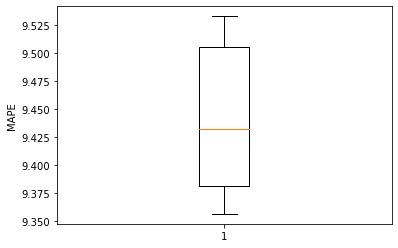

In [39]:
print("Mean MAPE :", np.mean(MAPE_))
plt.boxplot(MAPE_)
plt.ylabel("MAPE")
plt.show()

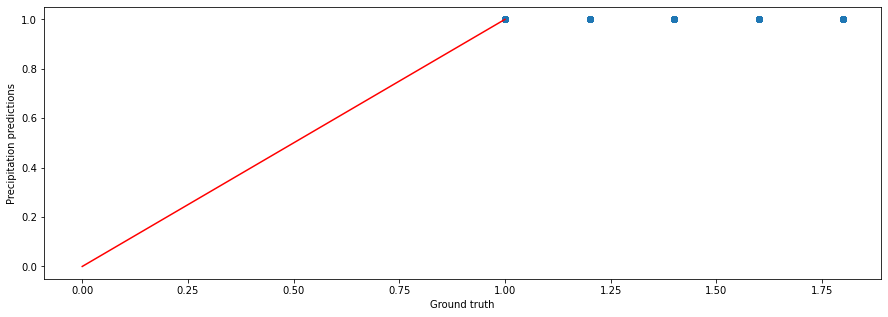

In [40]:
plt.figure(figsize=(15,5))
true_line = np.arange(0,max(ytrain_v['Ground_truth']))
plt.scatter(ytrain_v['Ground_truth'], Network_validation['Prediction'])
plt.plot(true_line, true_line, color='r')
plt.xlabel("Ground truth")
plt.ylabel("Precipitation predictions")
plt.show()

In [48]:
ytrain_v['Ground_truth'].value_counts()

1.0    6742
1.2    2740
1.4     816
1.6     475
1.8     396
Name: Ground_truth, dtype: int64

## <font color = 'royalblue'>7 Prediction</font>

In [41]:
predictions_network = NN.predict(xtestS_p_N)
Network_predictions = bl_obsT.copy()
Network_predictions["Prediction"] = predictions_network
display(Network_predictions.head())

,Id,Prediction
0,14066001_149,-0.000034
1,14126001_149,-0.000034
2,14137001_149,-0.000034
3,14216001_149,-0.000034
4,14296001_149,-0.000034


In [42]:
print(min(Network_predictions["Prediction"]))

-3.395022940821946e-05


## <font color = 'royalblue'>8 Post-processing</font>

In [43]:
Network_predictions["Prediction"] = Network_predictions["Prediction"] + 1
display(Network_predictions.head())
print('Missing Data :', Network_predictions.isna().sum().sum(), '\n', 'Shape is :', Network_predictions.shape)

,Id,Prediction
0,14066001_149,0.999966
1,14126001_149,0.999966
2,14137001_149,0.999966
3,14216001_149,0.999966
4,14296001_149,0.999966


Missing Data : 0 
 Shape is : (85140, 2)


## <font color = 'royalblue'>9 Exportation</font>

In [44]:
output_file = "Submissions_13_ann-20x32-month-mae.csv"
Network_predictions.to_csv('/Users/qdouzery/Desktop/Defi-IA-2022_DGM/Submissions/' + output_file, index=False)

#output_file = "Submissions_13_ann-20x32-month-mae.csv"
#Network_predictions.to_csv('C:/Users/Alexia/Desktop/5A/Defi-IA-2022_DGM/Submissions' + output_file, index=False)